Импорт библиотек


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn


In [3]:
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics


In [4]:
from tensorflow import keras
from keras.engine.sequential import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

import pickle
print('tensorflow', tf.__version__, '\nnumpy', np.__version__)


tensorflow 2.12.0 
numpy 1.22.4


In [5]:
# Установим значение RANDOM_STATE  
RANDOM_STATE = 42


Вводим исходный датасет

Загружаем первую таблицу X_bp

In [6]:
from google.colab import files
uploaded = files.upload()


Saving X_bp.xlsx to X_bp.xlsx


In [7]:
df_bp = pd.read_excel(r"X_bp.xlsx")
df_bp.shape

(1023, 11)

In [8]:
# Смотрим столбцы
df_bp.columns

Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

In [9]:
df_bp.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                         1.857143            2030.0   
1           1                         1.857143            2030.0   
2           2                         1.857143            2030.0   
3           3                         1.857143            2030.0   
4           4                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [10]:
# Проверим размерность первого файла
df_bp.shape

(1023, 11)

Загрузим таблицу  X_nup.xlsx

In [11]:
from google.colab import files
uploaded = files.upload()

Saving X_nup.xlsx to X_nup.xlsx


In [12]:
df_nup = pd.read_excel(r"X_nup.xlsx")
df_nup.shape

(1040, 4)


Заданием установлено, что это единый набор данных,  предписано «совершить объединение по индексу тип INNER». Отметим, что таблицы имеют разный набор строк.


In [13]:
data_set1 = pd.read_excel(r"X_bp.xlsx", index_col=0, engine='openpyxl')
data_set2 = pd.read_excel(r"X_nup.xlsx", index_col=0, engine='openpyxl')
rrr_dataset = data_set1.join(data_set2, how='inner')
rrr_dataset.head()


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [14]:
# Размерность
rrr_dataset.shape

(1023, 13)

Объединенный  датасет имеет 13 столбцов и 1023 строки, 17 строк из таблицы X_nup было удалена при объединении.

In [15]:
#Сохраняем объединенную таблицу
rrr_dataset.to_excel(r'rrr_dataset.xlsx')

Ознакомимся с  данными и проведем разведочный анализ

Информация о  датасете, зафиксируем тип данных в столбцах (типы признаков)

In [16]:
rrr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Выводы: 12 переменных содержат значения типа float64. и одно int64 ,качественные характеристики отсутствуют. Пропусков не имеется. Ни одна из записей не является null.  Очистка не требуется.


In [17]:
# Дополнительно проверим на пропуски
rrr_dataset.isnull().sum()


Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет, что не удивительно, т.к. датасет подготовлен для вкр.

In [18]:
#Поиск уникальных значений с помощью функции nunique
rrr_dataset.nunique()


Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Наблюдаем близкое между собой число уникальных значений в каждом столбце, а в столбце "Угол нашивки" всего 2 значения. Трансформируем его в более удобный для анализа вид данных.

In [19]:
# Приведем столбец "Угол нашивки" к значениям 0 и 1 и integer
rrr_dataset = rrr_dataset.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
rrr_dataset['Угол нашивки, град'] = rrr_dataset['Угол нашивки, град'].astype(int)


In [21]:
#Переименуем столбец
rrr_dataset = rrr_dataset.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})


In [20]:
# Результат
rrr_dataset.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [21]:
# Проверим датасет на дубликаты
rrr_dataset.duplicated().sum()

0

Дубликатов нет

По заданию необходимо вывести средние и медианные значения для каждого столбца выведем их

In [22]:
# среднее значение
rrr_dataset.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                         0.491691
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [23]:
# медианное значение
rrr_dataset.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

Описательная статистика содержит по каждому столбцу (по каждой переменной):

count - количество значений

mean - среднее значение

std - стандартное отклонение

min - минимум

25% - верхнее значение первого квартиля

50% - медиана

75% - верхнее значение третьего квартиля

max - максимум


In [24]:
# Выводим описательную статистику
rrr_dataset.describe().T


count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0     0.491691    0.500175   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                       1.000000     1.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Выводы: 12 переменных содержат значения  тип float64. Качественные характеристики отсутствуют. Пропусков не имеется. Ни одна из записей не является null.  Очистка не требуется. Дубликатов нет. В целом мы видим близкие друг к другу значения переменных. 

Визуализируем исходные данные и проведем анализ

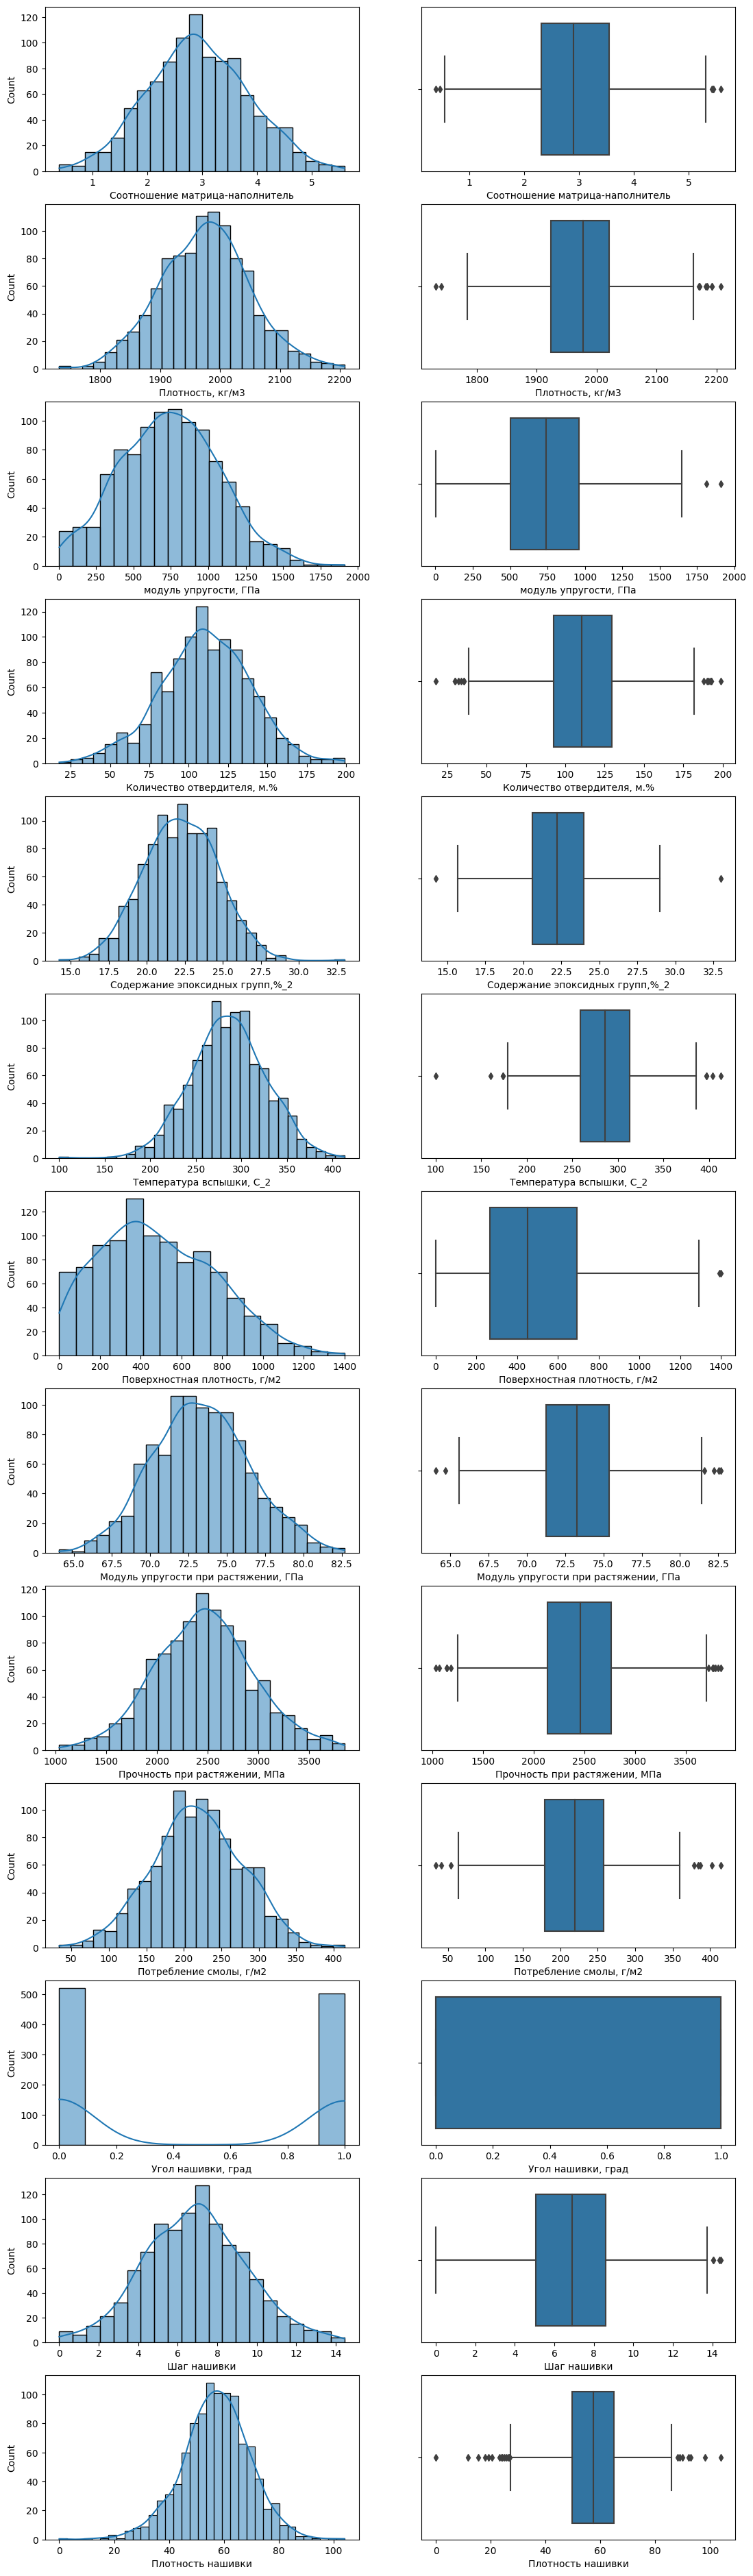

In [25]:
# Строим графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(rrr_dataset.columns):    
    sns.histplot(data= rrr_dataset, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data= rrr_dataset, x=column, ax=axes[k, 1])
plt.show()


Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак.

 Кроме "Угол нашивки, град" и "Поверхностная плотность, г/м2" остальные переменные относительно хорошо соответствуют нормальному распределению


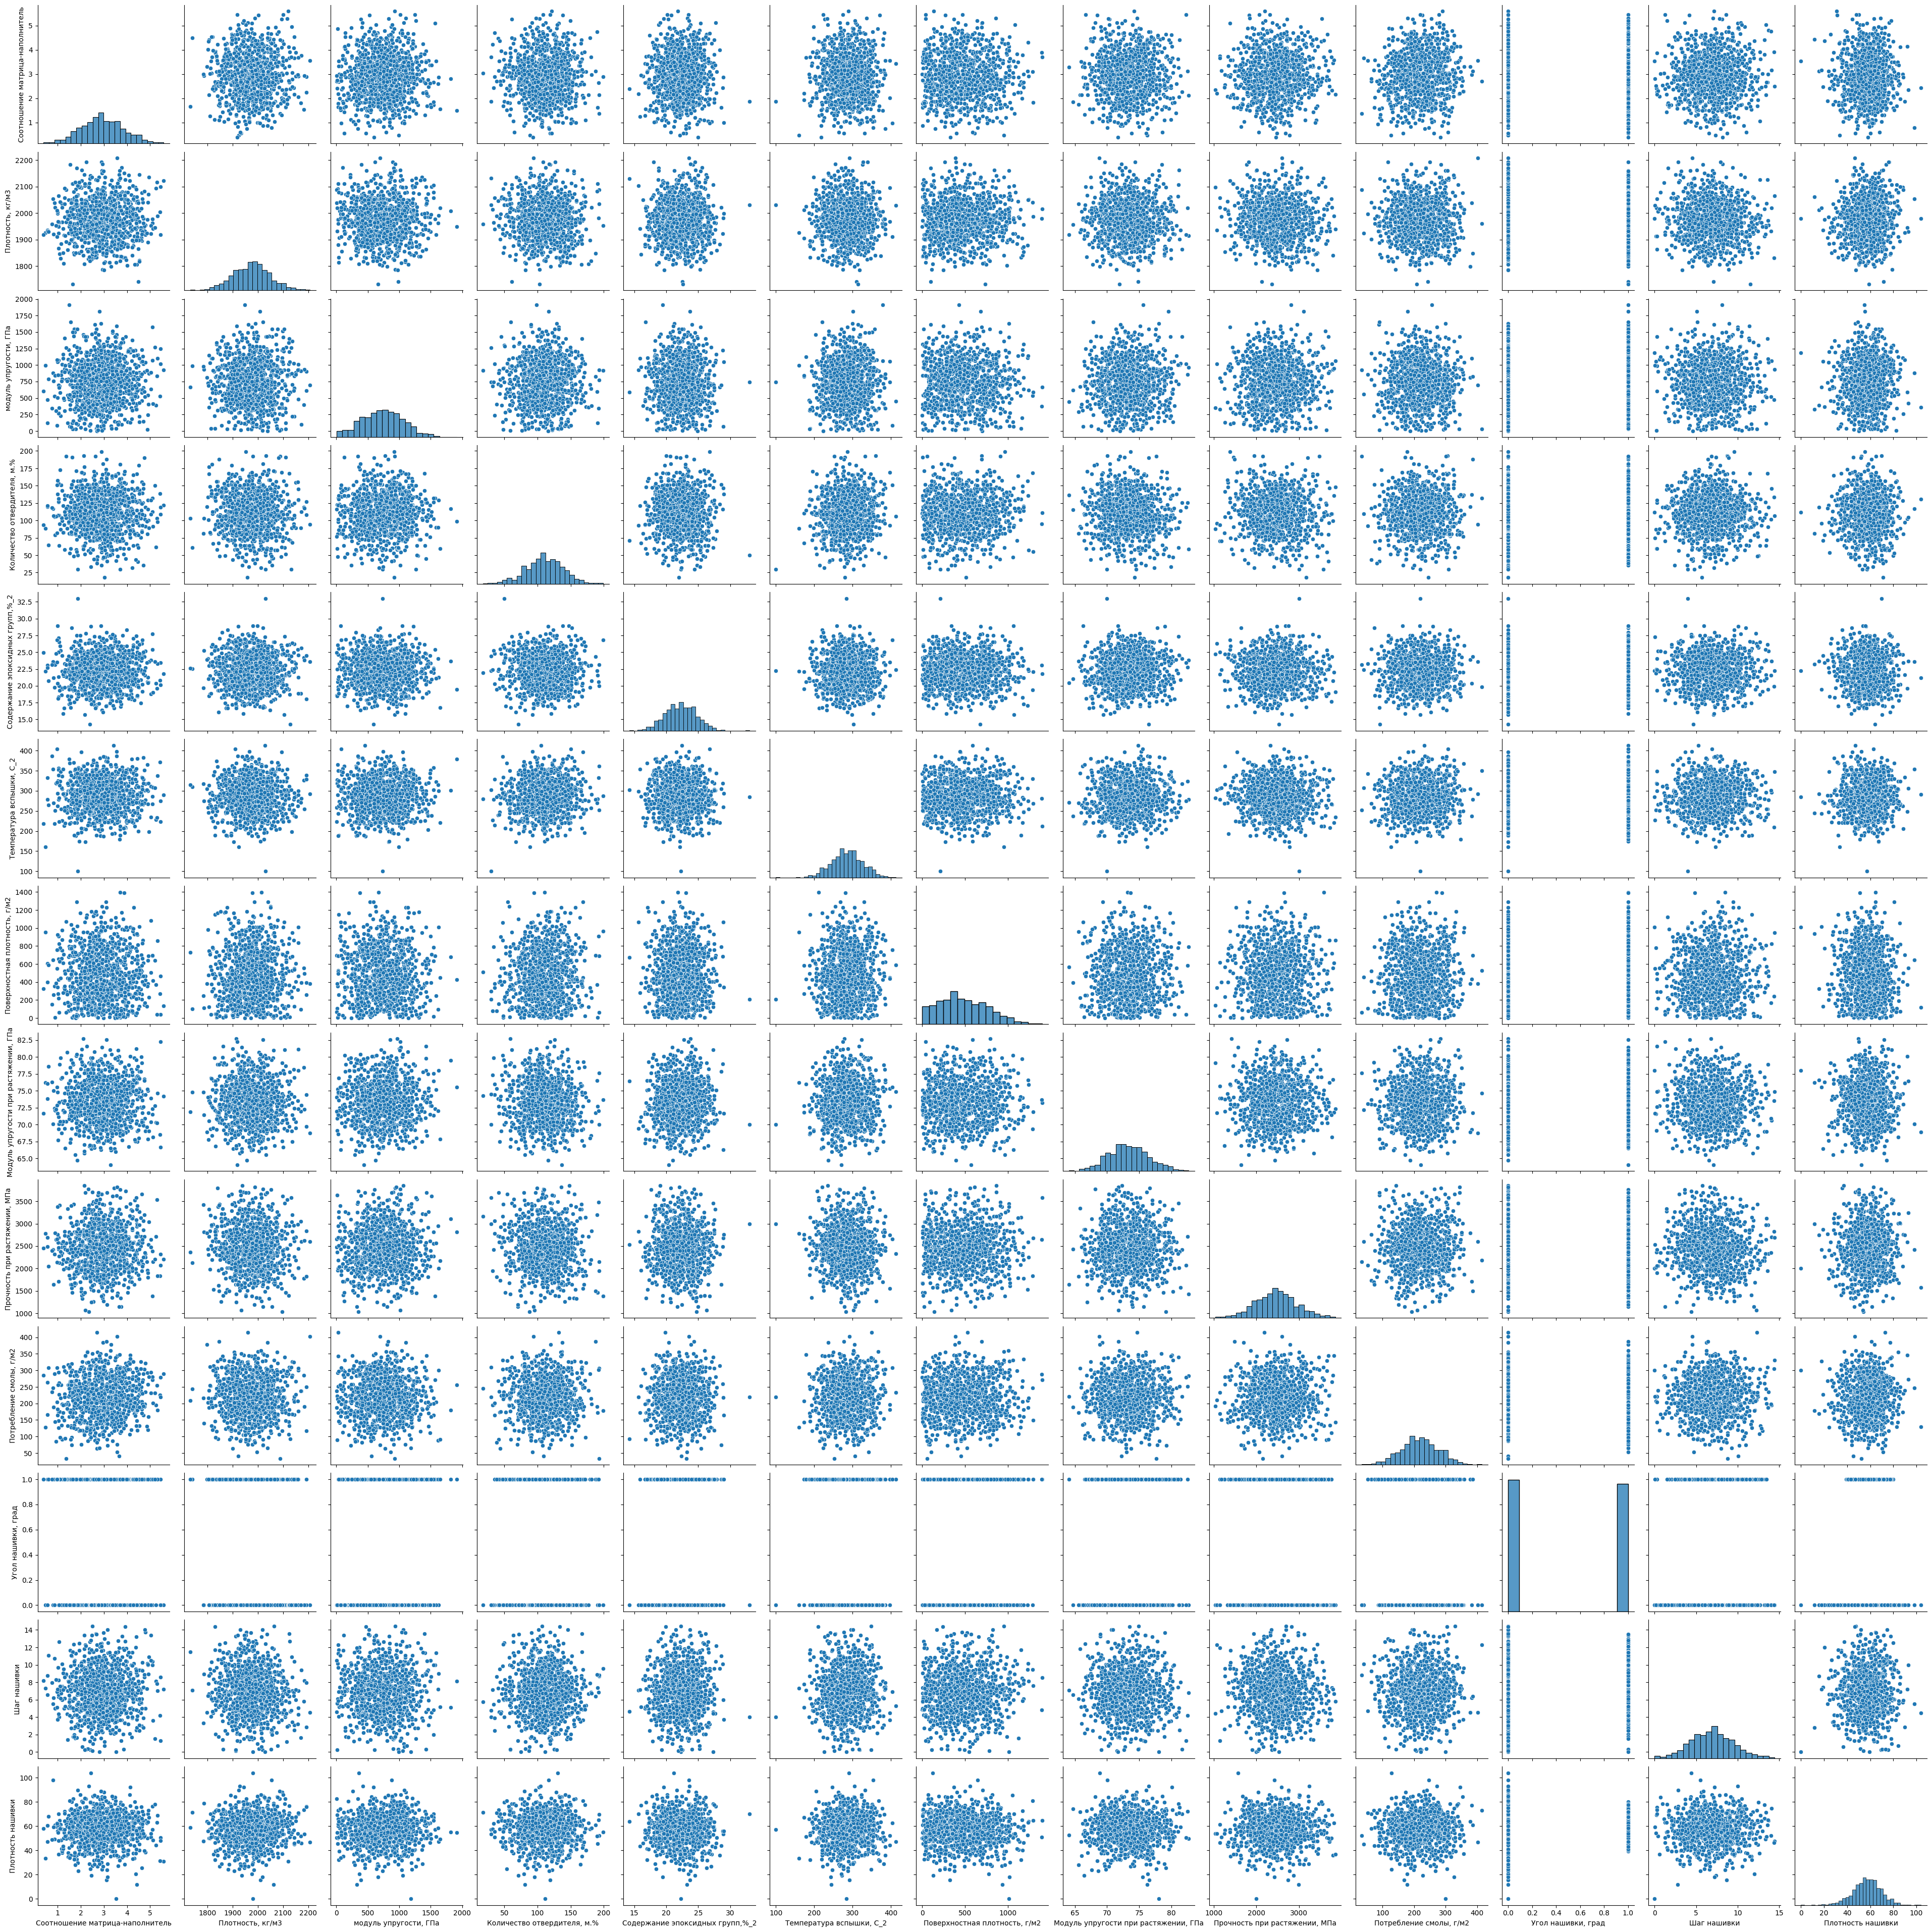

In [26]:
# Построю попарные графики рассеяния
sns.pairplot(rrr_dataset, height=3);

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение. Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак.


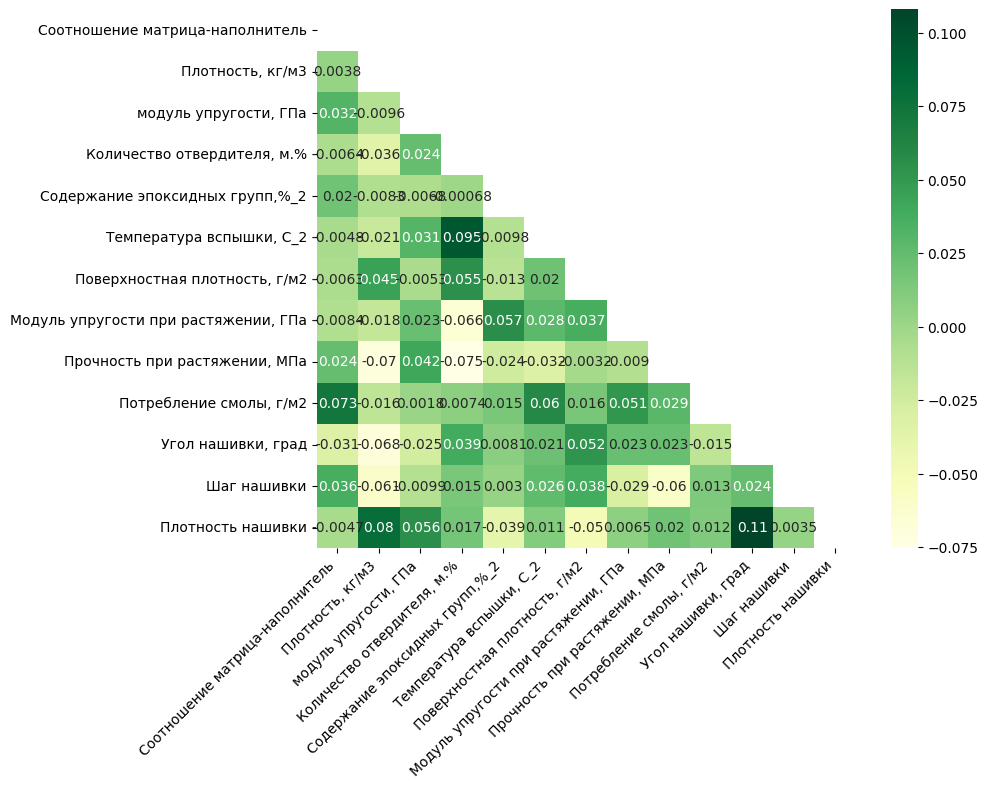

In [27]:
#Визуализация корреляционной матрицы 
mask = np.triu(rrr_dataset.corr())
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (9, 7))
# # Визуализируем данные кореляции и создаем цветовую палитру
sns.heatmap(rrr_dataset.corr(), mask = mask, annot = True, square = True, cmap = 'YlGn')
plt.xticks(rotation = 45, ha='right')
plt.show()


Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. Наблюдаем выбросы.

Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

В целом это указывает на возможное существование скрытых переменных, оказывающее существенное влияние на свойства композита, а так же на возможные ошибки на всех этапах научной работы.


Выбор методов.Для поиска выбросов есть разные методы. Например:
 3-х сигм,  межквартильных расстояний, изолирующего леса и др.
 Выберем метод 3 сигм.

 - Метод трех сигм известен своей эффективностью в уменьшении количества дефектов. Метод трех сигм не требует сложной статистической обработки данных и может быть легко реализован.

 Так как датасет был предварительно очищен , метод хорошо подходит.

Соотношение матрица-наполнитель: s=0


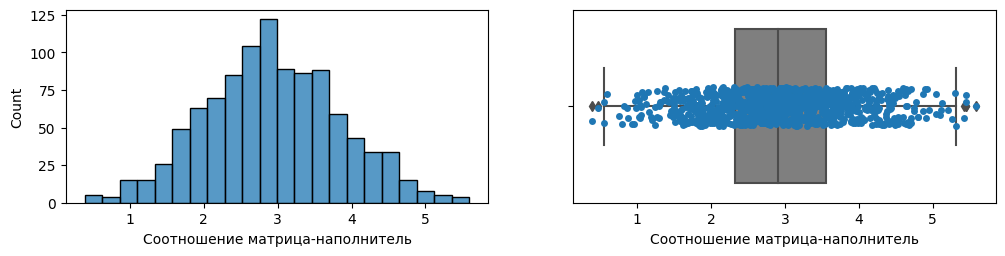

Плотность, кг/м3: s=3


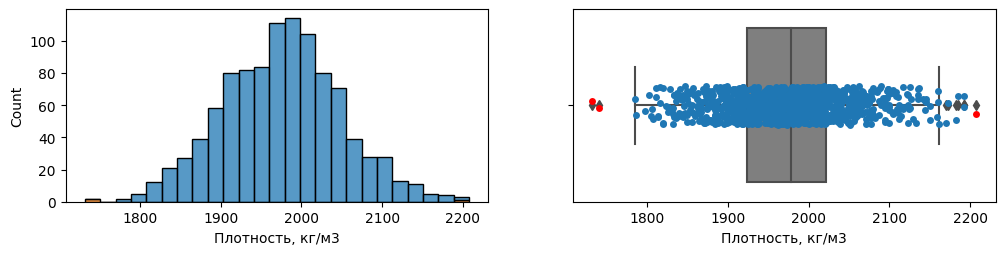

модуль упругости, ГПа: s=2


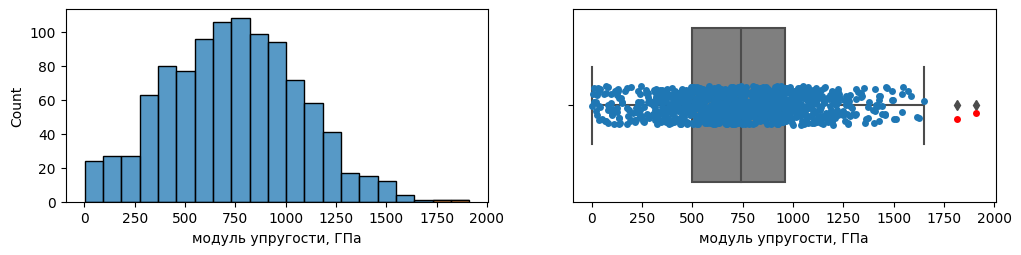

Количество отвердителя, м.%: s=2


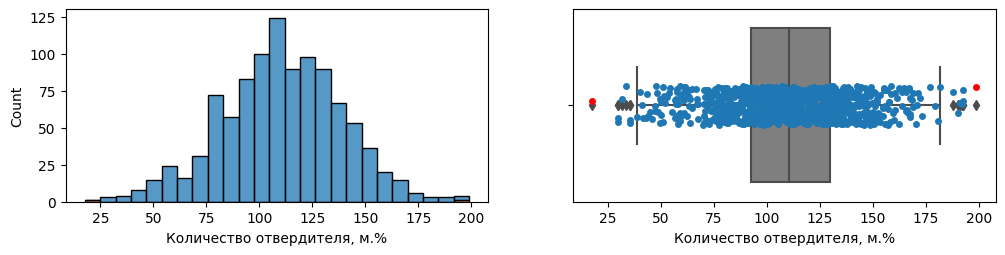

Содержание эпоксидных групп,%_2: s=2


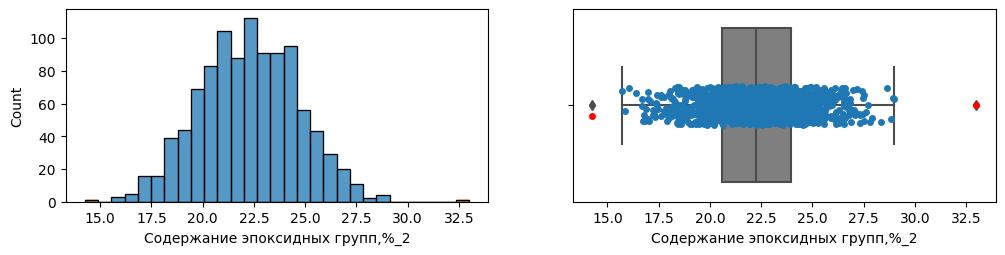

Температура вспышки, С_2: s=3


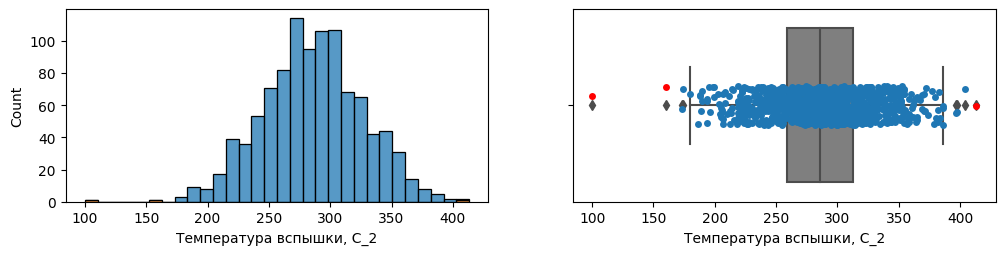

Поверхностная плотность, г/м2: s=2


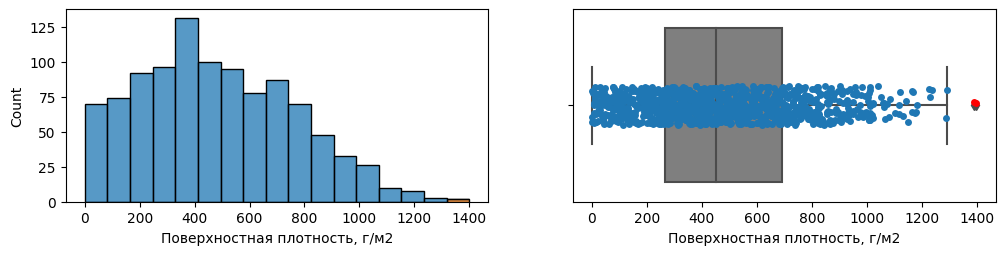

Модуль упругости при растяжении, ГПа: s=0


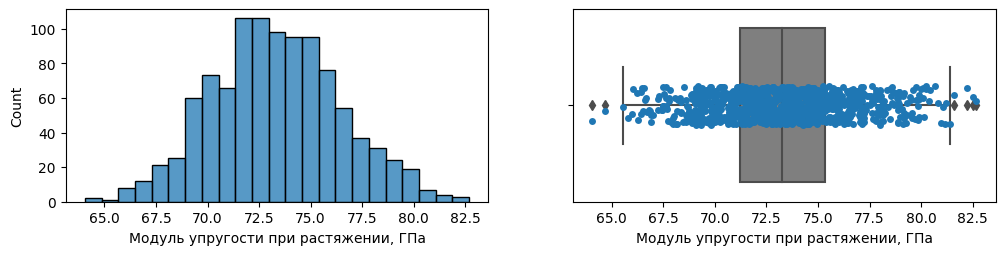

Прочность при растяжении, МПа: s=0


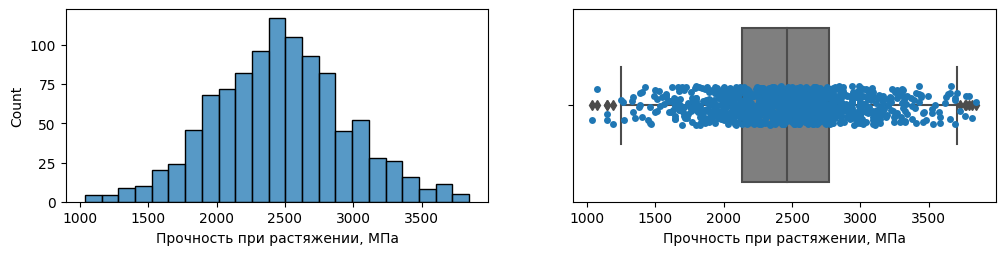

Потребление смолы, г/м2: s=3


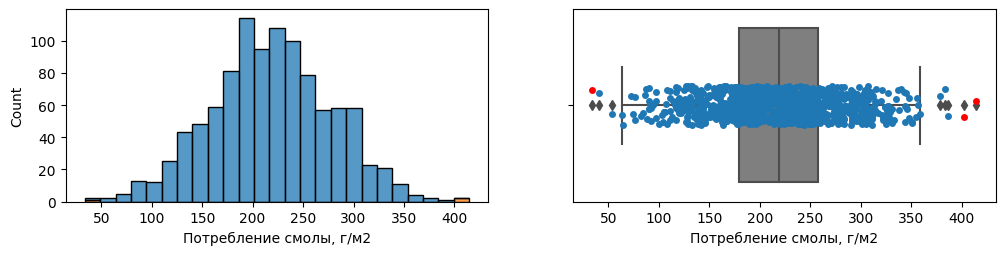

Угол нашивки, град: s=0


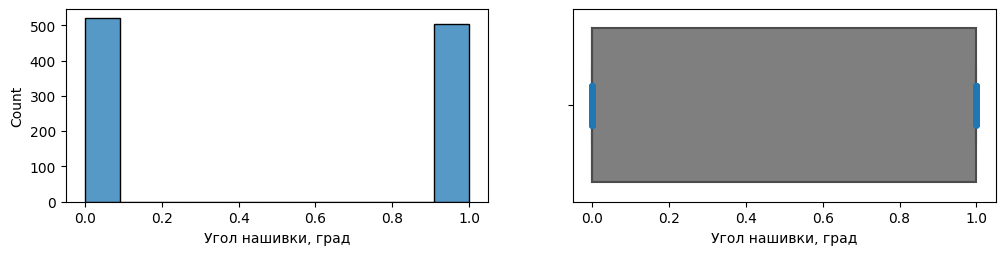

Шаг нашивки: s=0


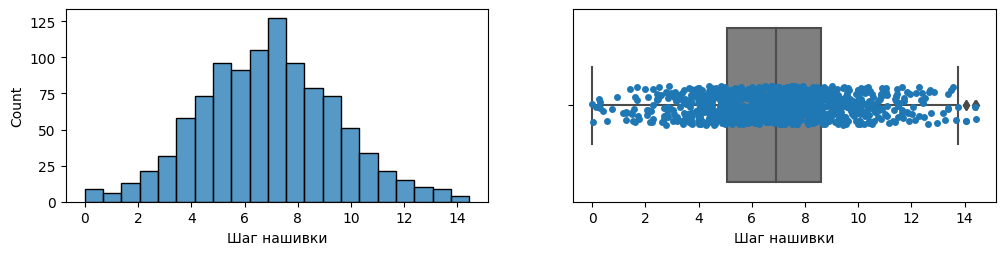

Плотность нашивки: s=7


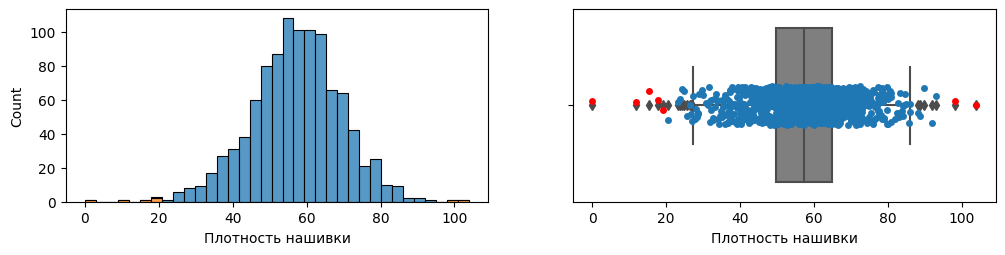

Найдено выбросов: 24


In [28]:
# Ищем выбросы. Воспользуемся методом трех сигм.
count = 0
for column in rrr_dataset:
    d = rrr_dataset.loc[:, [column]]
    zscore = (rrr_dataset[column] - rrr_dataset[column].mean()) / rrr_dataset[column].std()
    d['s'] = zscore.abs() > 3
    count += d['s'].sum()
  
# Визуализация выбросов
    print('{}: s={}'.format(column, d['s'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['s']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['s']==True], x=column, color='red', ax=axes[1])
    plt.show()

print('Найдено выбросов:', count)



In [29]:
# Удаляем выбросы методом 3-х сигм
outliers = pd.DataFrame(index= rrr_dataset.index)
for column in rrr_dataset:
    zscore = (rrr_dataset [column] - rrr_dataset [column].mean()) / rrr_dataset [column].std()
    outliers[column] = (zscore.abs() > 3)
rrr_dataset = rrr_dataset [outliers.sum(axis=1)==0]
rrr_dataset.shape


(1000, 13)

По внешнему виду графиков не видно зависимостей между признаками. Оптимально входные переменные не должны быть взаимозависимыми. Но выходые переменные должны показывать зависимость от входных, для нормальной работы  модели по предсказанию  выходных переменных.

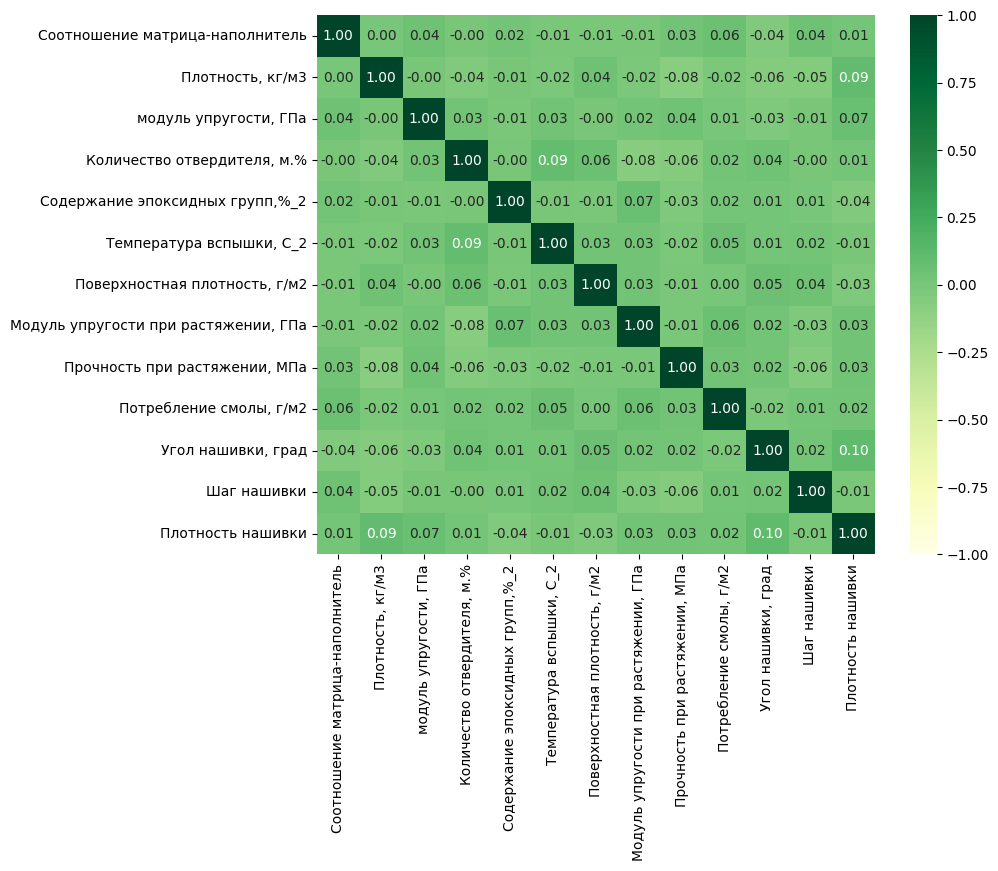

In [31]:
# Выведем матрицу корреляции.
corr = rrr_dataset.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='YlGn', ax=ax)
plt.show()


Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Очевидно применение линейных моделей регрессии не даст приемлемого результата.

Сохраним датасет

In [39]:
rrr_dataset.to_excel(r'dataclean.xlsx')

Обучиение моделей

В соответствии с исходным заданием необходимо:

30% данных оставить для тестирования модели, 70% для обучения.

Осуществить предобработку данных (нормализация и т.д.).

Провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.

Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [37]:
# Грузим данные, полученные на предыдущем этапе
from google.colab import files
uploaded = files.upload()

Saving rrr_dataclean.xlsx to rrr_dataclean (1).xlsx


In [45]:
dataclean = pd.read_excel(r"dataclean.xlsx")
dataclean

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0             1                         1.857143       2030.000000   
1             3                         1.857143       2030.000000   
2             4                         2.771331       2030.000000   
3             5                         2.767918       2000.000000   
4             6                         2.569620       1910.000000   
..          ...                              ...               ...   
995        1018                         2.271346       1952.087902   
996        1019                         3.444022       2050.089171   
997        1020                         3.280604       1972.372865   
998        1021                         3.705351       2066.799773   
999        1022                         3.808020       1890.413468   

     модуль упругости, ГПа  Количество отвердителя, м.%  \
0               738.736842                    50.000000   
1               738.736842                   129.000000   
2               753.000000                   111.860000   
3               748.000000                   111.860000   
4               807.000000                   111.860000   
..                     ...                          ...   
995             912.855545                    86.992183   
996             444.732634                   145.981978   
997             416.836524                   110.533477   
998             741.475517                   141.397963   
999             417.316232                   129.183416   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                          23.750000                284.615385   
1                          21.250000                300.000000   
2                          22.267857                284.615385   
3                          22.267857                284.615385   
4                          22.267857                284.615385   
..                               ...                       ...   
995                        20.123249                324.774576   
996                        19.599769                254.215401   
997                        23.957502                248.423047   
998                        19.246945                275.779840   
999                        27.474763                300.952708   

     Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                       210.000000                             70.000000   
1                       210.000000                             70.000000   
2                       210.000000                             70.000000   
3                       210.000000                             70.000000   
4                       210.000000                             70.000000   
..                             ...                                   ...   
995                     209.198700                             73.090961   
996                     350.660830                             72.920827   
997                     740.142791                             74.734344   
998                     641.468152                             74.042708   
999                     758.747882                             74.309704   

     Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                      3000.000000               220.000000   
1                      3000.000000               220.000000   
2                      3000.000000               220.000000   
3                      3000.000000               220.000000   
4                      3000.000000               220.000000   
..                             ...                      ...   
995                    2387.292495               125.007669   
996                    2360.392784               117.730099   
997                    2662.906040               236.606764   
998                    2071.715856               197.126067   
999                    2856.328932               194.754

Данные подлежат распределению на входные и выходные переменные
Статистическими методами мы зависимостей не обнаружили. 

По условиям задачи переменные делятся на:

- на целевые или выходные

- входные

По датасету можно предположить несколько версий технолоогического процесса. Однако поскольку дополнительной информации по процессу постановщиком задачи не предаставлено, ровно как и информации о точках съема предоставленных данных в цепочке технологического проесса,  и исходя из смысла задания, достоверно мы можем установить лишь, что соотношение матрица - наполнитель это входная переменная установленная перед началом технологического процесса, а модуль упругости при растяжении, ГПа и  прочность при растяжении, МПа это целевые переменные измеряемые по окончании технологического процесса. Следует отметить, что переменные датасета  так же, являясь физическими и химическими характеристиками не обладают четкой размерностью и не указывают на конкретные объекты участвующие в технологическом процессе. Представляется, что это сделано сознательно. Не ясна цель неоправданного усложнения.

Следует отметить , что соотношение матрица - наполнитель в третьей части задания становится целевой переменной.

Таким образом:
Целевые признаки можно представить в виде:

модуль упругости при растяжении, Гпа = f(весь датасет, кроме прочности при растяжении, МПа);

прочность при растяжении, МПа = f(весь датасет, кроме модуля упругости при растяжении, ГПа);;

соотношение матрица-наполнитель = f(весь датасет, кроме соотношения матрица-наполнитель).

Для каждого из целевых признаков рисуем отдельную модель, следовательно решим 3 отдельные задачи.



